In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Loading the dataset from Excel file
file_path = "diabetes.csv"
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


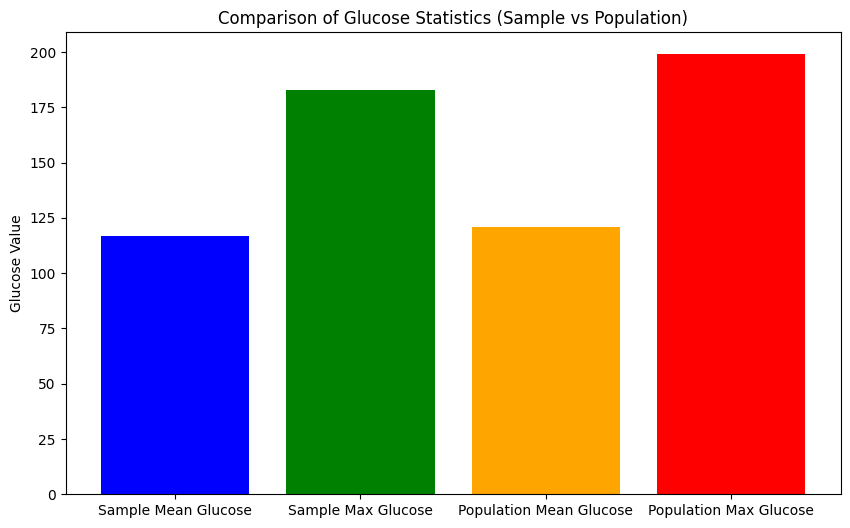

In [4]:
# Set seed for reproducibility
np.random.seed(42)

# Take a random sample of 25 observations
sample = data.sample(n=25)

# Calculating mean and highest Glucose values for sample and population
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()
population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()

# Creating a bar chart for comparison
labels = ['Sample Mean Glucose', 'Sample Max Glucose', 'Population Mean Glucose', 'Population Max Glucose']
values = [sample_mean_glucose, sample_max_glucose, population_mean_glucose, population_max_glucose]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Comparison of Glucose Statistics (Sample vs Population)')
plt.ylabel('Glucose Value')
plt.show()


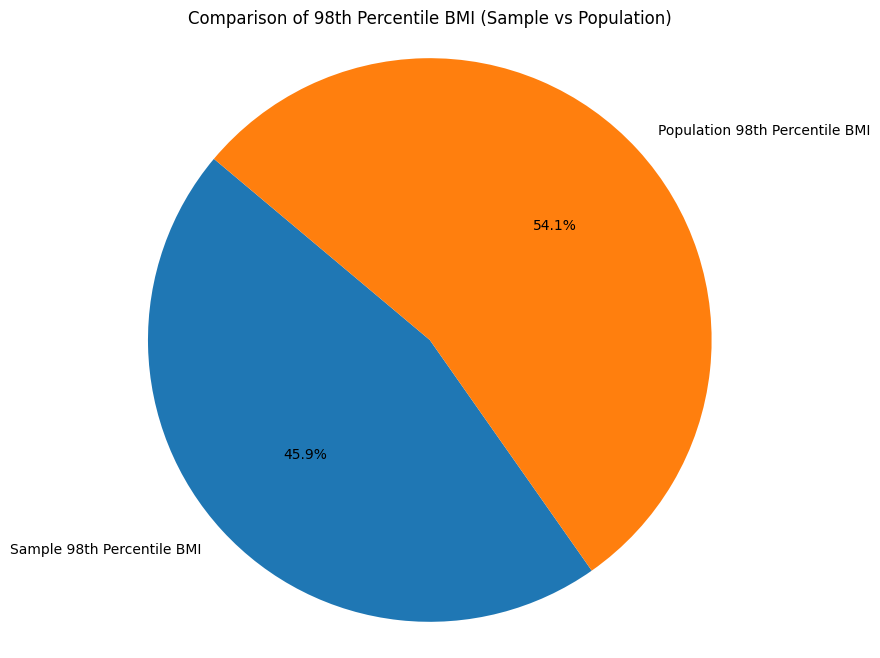

In [ ]:
# Finding the 98th percentile of BMI for sample and population
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
population_98th_percentile_bmi = np.percentile(data['BMI'], 98)

# Creating a pie chart for comparison
labels = ['Sample 98th Percentile BMI', 'Population 98th Percentile BMI']
sizes = [sample_98th_percentile_bmi, population_98th_percentile_bmi]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Comparison of 98th Percentile BMI (Sample vs Population)')
plt.axis('equal')
plt.show()


Population Mean BloodPressure: 69.10546875
Population Standard Deviation BloodPressure: 19.355807170644777
Population 98th Percentile BloodPressure: 99.31999999999994


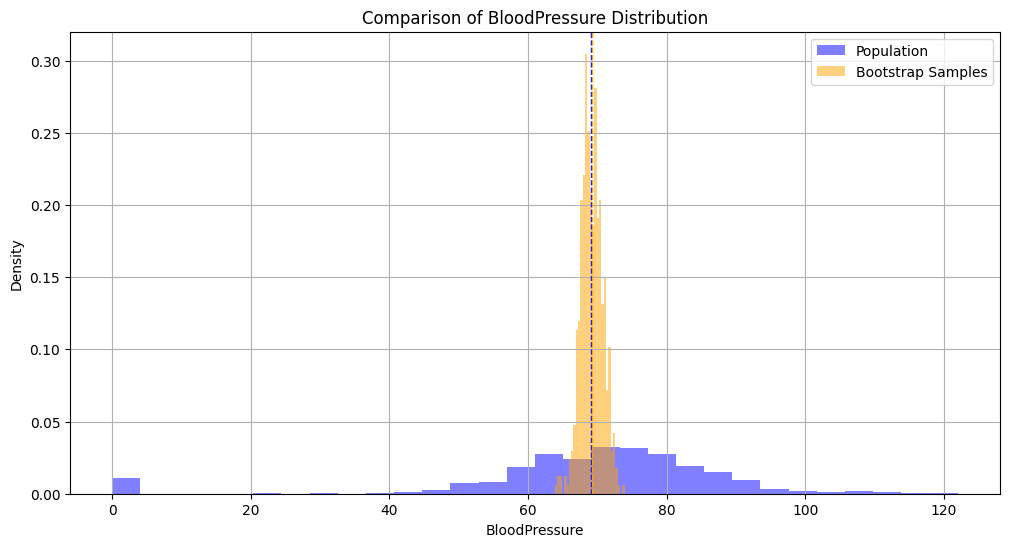

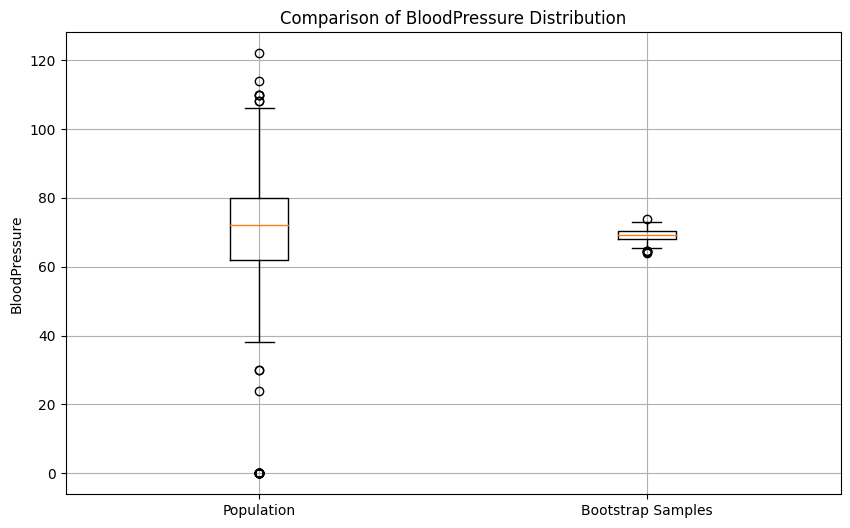

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset from Excel file
file_path = "diabetes.csv"
data = pd.read_csv(file_path)

def bootstrap_sampling(data, variable, num_samples, sample_size):
    population_data = data[variable].values

    mean_values = []
    std_dev_values = []
    percentile_values = []

    # Performing the bootstrap sampling
    for _ in range(num_samples):
        sample = np.random.choice(population_data, size=sample_size, replace=True)
        mean_values.append(np.mean(sample))
        std_dev_values.append(np.std(sample))
        percentile_values.append(np.percentile(sample, 98))

    return mean_values, std_dev_values, percentile_values

# Setting seed for reproducibility
np.random.seed(42)

# Parameters for bootstrap sampling
num_samples = 500
sample_size = 150

mean_values, std_dev_values, percentile_values = bootstrap_sampling(data, 'BloodPressure', num_samples, sample_size)

population_mean = data['BloodPressure'].mean()
population_std_dev = data['BloodPressure'].std()
population_percentile = np.percentile(data['BloodPressure'], 98)

# Printing the  population statistics
print("Population Mean BloodPressure:", population_mean)
print("Population Standard Deviation BloodPressure:", population_std_dev)
print("Population 98th Percentile BloodPressure:", population_percentile)

# Comparing the  bootstrap statistics with population statistics
# Plotting histograms for comparison
plt.figure(figsize=(12, 6))

# Histogram of population data
plt.hist(data['BloodPressure'], bins=30, alpha=0.5, label='Population', color='blue', density=True)

# Histogram of bootstrap sample means
plt.hist(mean_values, bins=30, alpha=0.5, label='Bootstrap Samples', color='orange', density=True)

plt.axvline(population_mean, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(mean_values), color='orange', linestyle='dashed', linewidth=1)

plt.xlabel('BloodPressure')
plt.ylabel('Density')
plt.title('Comparison of BloodPressure Distribution')
plt.legend()
plt.grid(True)
plt.show()

# Plotting boxplots for comparison
plt.figure(figsize=(10, 6))
plt.boxplot([data['BloodPressure'], mean_values], labels=['Population', 'Bootstrap Samples'])
plt.ylabel('BloodPressure')
plt.title('Comparison of BloodPressure Distribution')
plt.grid(True)
plt.show()

